In [ ]:
# https://github.com/calmisential/TensorFlow2.0_ResNet

In [37]:
from glob import glob 
import os
import matplotlib.pyplot as plt
import numpy as np

# 학습데이터 확인

In [29]:
train_path = glob('dataset/casting_data/train/**/*.jpeg')
val_path = glob('dataset/casting_data/test/**/*.jpeg')
print('number of trainset', len(train_path))
print('number of val', len(val_path))

number of trainset 6633
number of val 715


In [30]:
classes = glob('dataset/casting_data/train/*')

print('클래스 종류')
for c in classes:
    print('-', os.path.basename(c))
#print("학습데이터 클래스 종류", trn_dataset.label_map)

클래스 종류
- defect
- normal


In [44]:
normal = glob('dataset/casting_data/train/normal/*.jpeg')
defect = glob('dataset/casting_data/train/defect/*.jpeg')

In [45]:
y = [len(normal), len(defect)]

In [53]:
x = np.arange(len(y))

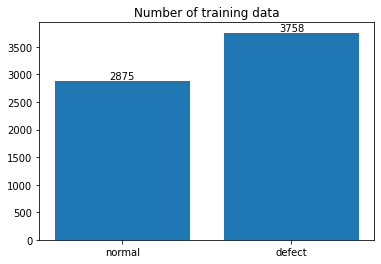

In [61]:
plt.bar(x, y)
plt.xticks(x, ('normal','defect')) 
for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom')

plt.title('Number of training data')
plt.show()

In [63]:
import cv2
sample_image = cv2.imread(normal[0])
print('image shapes', sample_image.shape)

image shapes (300, 300, 3)


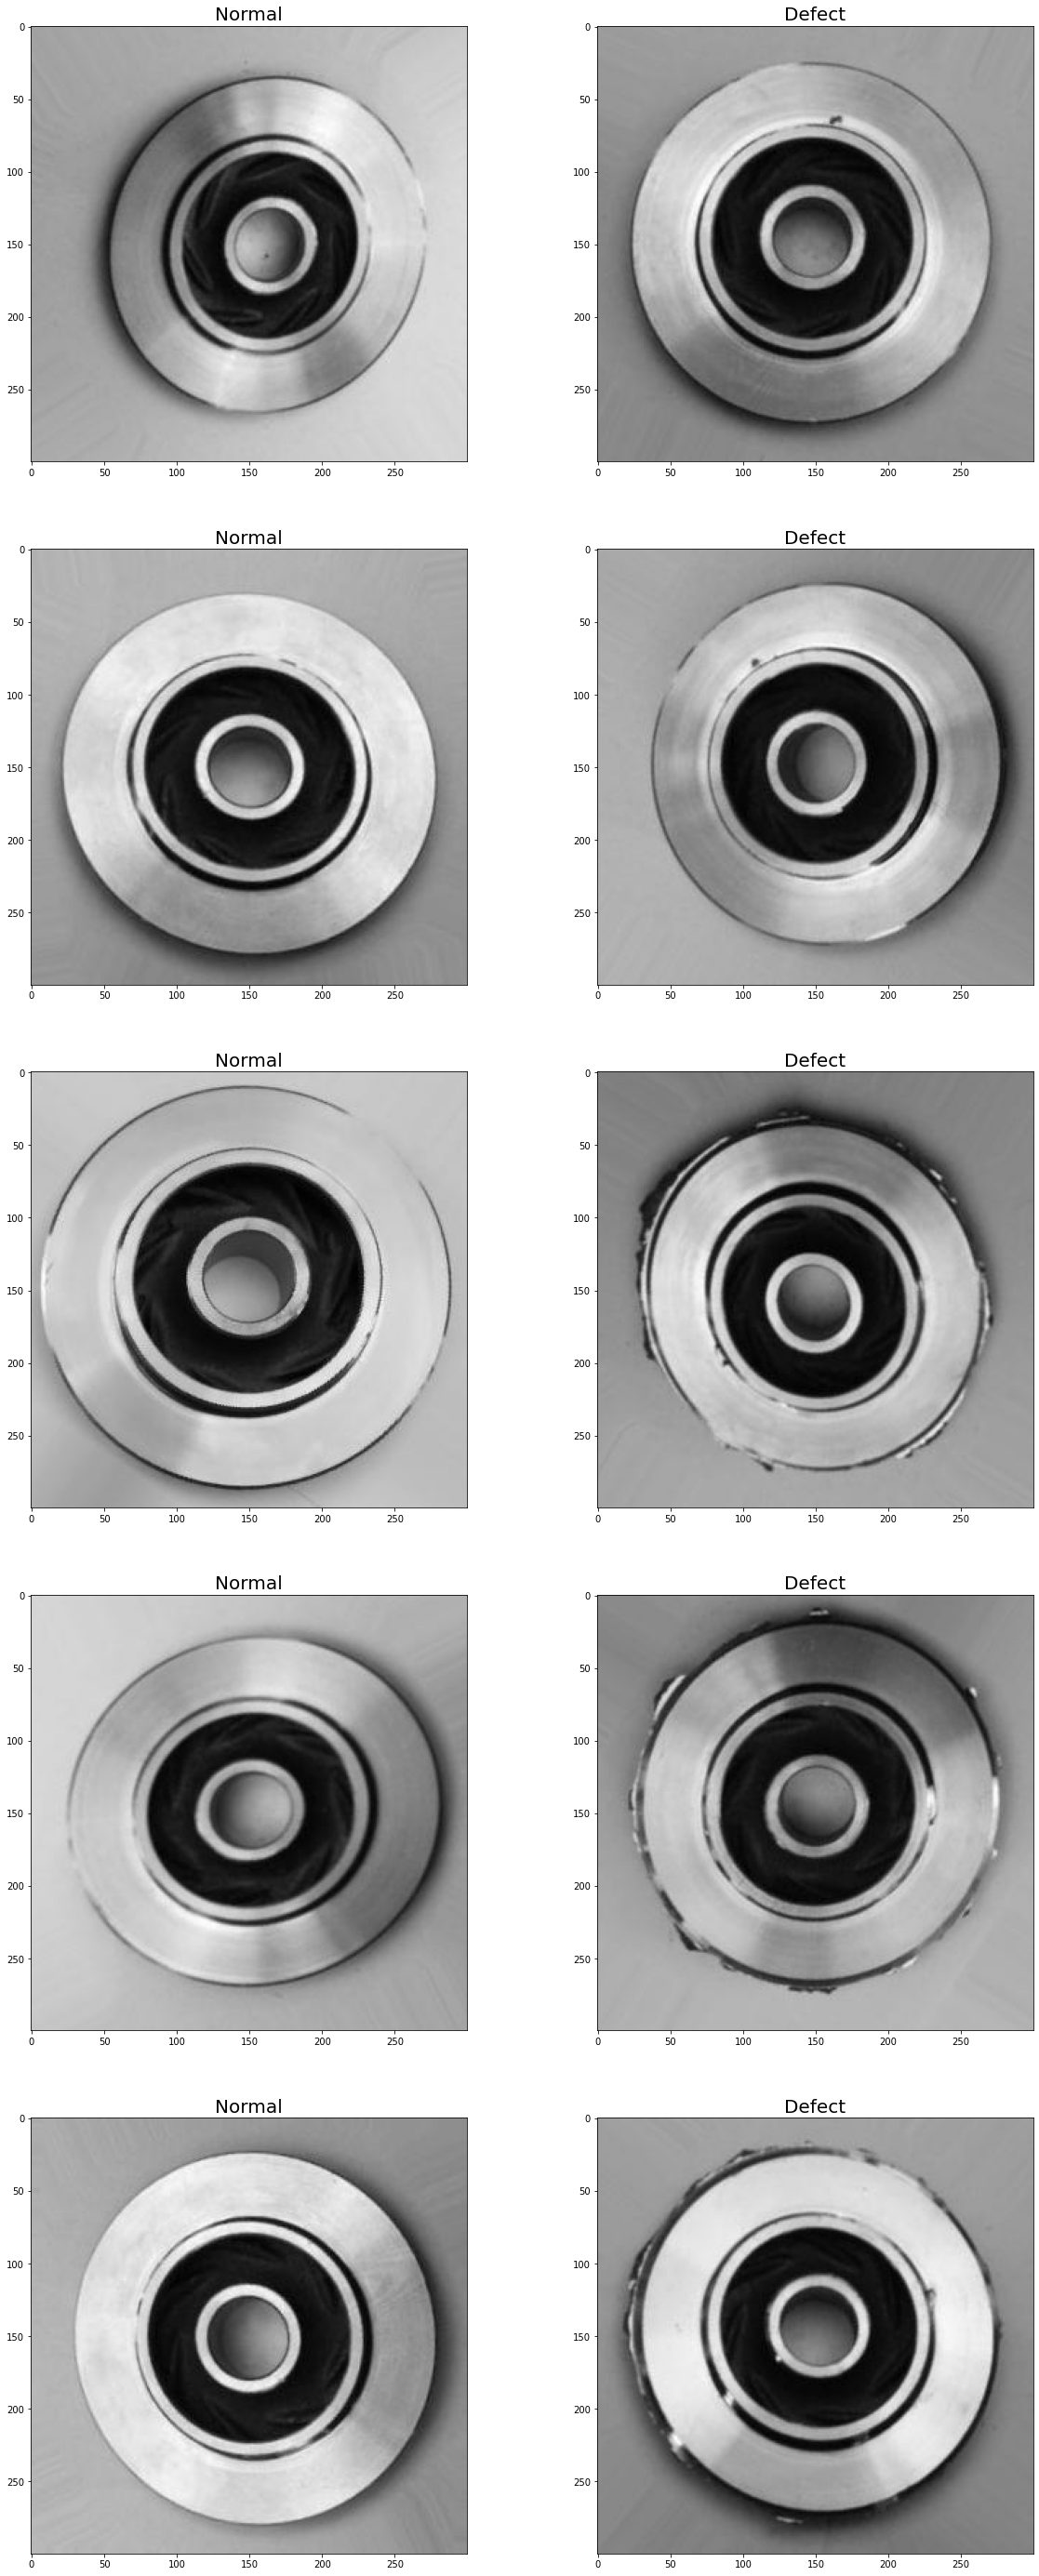

In [65]:
fig = plt.figure(figsize=(20, 50))
rows = 5
cols = 2
for idx in range(0, rows):
    img1 = cv2.imread(normal[idx])
    img2 = cv2.imread(defect[idx])

    ax1 = fig.add_subplot(rows, cols, idx*2+1)
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax1.set_title('Normal', size = 20)

    ax2 = fig.add_subplot(rows, cols, idx*2+2)
    ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax2.set_title('Defect', size = 20)

plt.show()

# 모델 학습

# 모델 학습
* --data_path 학습데이터셋의 위치 지정
* --epochs 학습 횟수
* --lr learning rate
* --batch_size 배치 사이즈
* --check_points 모델 저장 위치
    * 가장 좋은 결과는 model_best.h5
    * 마지막 학습 결과는 model_latest.h5 라는 이름으로 저장됨

In [75]:
!python3 model/tensorflow/resnet/train.py --epochs 2 \
    --data_path dataset/casting_data \
    --checkpoints_path check_points/resnet

2022-10-27 08:43:04.269290: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 08:43:04.791987: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9658 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5
Found 6633 files belonging to 2 classes.
Found 715 files belonging to 2 classes.
2022-10-27 08:43:07.222670: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-27 08:43:11.983625: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8500
Trn - Epoch: 1/2, loss: 0.36529, accuracy: 

# 모델 예측
* --data_path 테스트 데이터셋의 위치 지정
* --model_path 로드할 모델의 위치

In [77]:
!python3 model/tensorflow/resnet/inference.py --data_path dataset/casting_data/test \
    --model_path check_points/resnet/model_best.h5

2022-10-27 08:47:40.241357: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 08:47:40.763359: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9658 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5
2022-10-27 08:47:42.498512: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-27 08:47:43.189378: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8500
2022-10-27 08:47:43,761 - 1/715 - b'dataset/casting_data/test/defect/cast_def_0_1493.jpeg', Predicted : defect, Actual : def